# Credit Approval Data -- Exploration

From source:

"This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.
This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values."

From DataCamp:

"Columns are likely [Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income, ApprovalStatus]."

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('crx.data', header=None)
print(data.head(10))

  0      1       2  3  4   5  6      7  8  9   10 11 12     13     14 15
0  b  30.83   0.000  u  g   w  v  1.250  t  t   1  f  g  00202      0  +
1  a  58.67   4.460  u  g   q  h  3.040  t  t   6  f  g  00043    560  +
2  a  24.50   0.500  u  g   q  h  1.500  t  f   0  f  g  00280    824  +
3  b  27.83   1.540  u  g   w  v  3.750  t  t   5  t  g  00100      3  +
4  b  20.17   5.625  u  g   w  v  1.710  t  f   0  f  s  00120      0  +
5  b  32.08   4.000  u  g   m  v  2.500  t  f   0  t  g  00360      0  +
6  b  33.17   1.040  u  g   r  h  6.500  t  f   0  t  g  00164  31285  +
7  a  22.92  11.585  u  g  cc  v  0.040  t  f   0  f  g  00080   1349  +
8  b  54.42   0.500  y  p   k  h  3.960  t  f   0  f  g  00180    314  +
9  b  42.50   4.915  y  p   w  v  3.165  t  f   0  t  g  00052   1442  +


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB
None


In [5]:
print(data.describe())

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


## Missing Data
Missing data isn't NaN, so pandas isn't recognizing it as missing; instead, missing values are given '?'. First thing is to change that.

We don't have a lot of missing data, but we do have some. Specifically, in columns [0, 1, 3, 4, 5, 6, 13]. Since there's not a lot of it, I think I'm going to just get rid of it. 

In [6]:
# Replace the '?'s with NaN
data = data.replace(to_replace='?',value=np.nan)

In [7]:
# Checking to see that it worked -- yep
print(data.tail(20))

      0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
670    b  47.17   5.835  u  g   w   v  5.500  f  f   0  f  g  00465  150  -
671    b  25.83  12.835  u  g  cc   v  0.500  f  f   0  f  g  00000    2  -
672    a  50.25   0.835  u  g  aa   v  0.500  f  f   0  t  g  00240  117  -
673  NaN  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674    a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675    a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676    a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  -
677    b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  00100    1  -
678    a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g  00000   50  -
679    a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g  00000    0  -
680    b  19.50   0.290  u  g   k   v  0.290  f  f   0  f  g  00280  364  -
681    b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  00176  537  -
682    b  17

In [8]:
# How much missing data do we have?
print(data.isnull().sum())

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64


In [9]:
data.dropna(inplace=True)

In [10]:
# Make sure it worked and see how much data we have left
print(data.isnull().sum())
print(data.info())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
0     653 non-null object
1     653 non-null object
2     653 non-null float64
3     653 non-null object
4     653 non-null object
5     653 non-null object
6     653 non-null object
7     653 non-null float64
8     653 non-null object
9     653 non-null object
10    653 non-null int64
11    653 non-null object
12    653 non-null object
13    653 non-null object
14    653 non-null int64
15    653 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.7+ KB
None


## Preprocessing

We have many columns with data that isn't numerical. In order to use these features in our model, we need to encode them as numerical data.

In [12]:
from sklearn.preprocessing import LabelEncoder

# Instantiate 
encoder = LabelEncoder()

for col in data.columns:
    # We only need to encode the nonnumerical data
    if data[col].dtypes == 'object':
        encoder.fit(data[col])
        # Do the encoding in place
        data[col]=encoder.transform(data[col])

In [20]:
from sklearn.model_selection import train_test_split

#cc_apps = cc_apps.drop([11,13], axis=1)
# Convert to numpy array 
#data = data.values

X,y = data.drop(15, axis=1).values , data[15].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
rescaled_X_train = scaler.transform(X_train)
scaler.fit(X_test)
rescaled_X_test = scaler.transform(X_test)

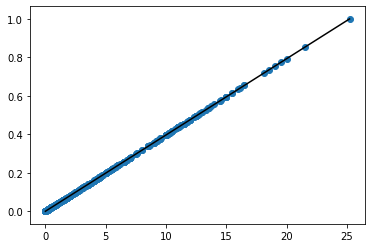

In [29]:
# Sanity check to make sure rescaling is as expected
plt.scatter(X_train[:,2], rescaled_X_train[:,2])
plt.plot(np.linspace(0,max(X_train[:,2]),10),np.linspace(0,1,10),color='black')

## Modeling

Our goal is to predict the outcome: approved or not. Logistic regression is a good place to start. 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Instantiate a LogisticRegression classifier
logreg = LogisticRegression(solver='lbfgs')

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.8425925925925926
[[85 10]
 [24 97]]


In [35]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = {'tol':tol, 'max_iter':max_iter}

In [36]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
scaler.fit(X)
rescaledX = scaler.transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.859112 using {'max_iter': 100, 'tol': 0.01}


/Users/orion/anaconda/envs/p36workshop/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
